In [1]:
!pip install selenium --default-timeout=100


  Using cached selenium-4.38.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached trio-0.32.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached trio_websocket-0.12.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached wsproto-1.3.2-py3-none-any.whl.metadata (5.2 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB 54.8 kB/s eta 0:02:57
   ---------------------------------------- 0.0/9.7 MB 100.9 kB/s eta 0:01:36
   ---------------------------------

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import csv


In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

driver_path = r"C:\Users\BBSUL\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe"
service = Service(driver_path)

options = Options()
options.headless = True  # GUI nahi khulega

driver = webdriver.Chrome(service=service, options=options)


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd


# Setup Chrome Driver

driver_path = r"C:\Users\BBSUL\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe"

options = Options()
options.headless = False  
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=options)
driver.set_page_load_timeout(120)  
wait = WebDriverWait(driver, 30)    


# All Main Categories (5)

main_categories = [
    {"name": "Toys", "url": "https://www.banggood.com/Wholesale-Toys-Hobbies-and-Robot-c-133.html?bid=210701&from=nav"},
    {"name": "Computers & Office", "url": "https://www.banggood.com/Wholesale-Computers-and-Office-ca-5001.html?bid=210707&from=nav"},
    {"name": "Automobiles & Motorcycles", "url": "https://www.banggood.com/Wholesale-Automobiles-and-Motorcycles-ca-4001.html?bid=210704&from=nav"},
    {"name": "Lights & Lighting", "url": "https://www.banggood.com/Wholesale-Lights-and-Lighting-ca-14001.html?bid=210710&from=nav"},
    {"name": "Home Appliance & Health", "url": "https://www.banggood.com/Wholesale-Home-Appliance-and-Health-ca-18949.html?bid=210708&from=nav"}
]

all_products = []


# Loop through each main category

for cat in main_categories:
    print(f"\nProcessing Main Category: {cat['name']}")
    driver.get(cat['url'])
    time.sleep(5)  # page load wait


    # Collect subcategory links
    
    subcategory_links = []
    try:
        subcategories = driver.find_elements(By.CSS_SELECTOR, ".nav a.exclick")
        for sub in subcategories:
            link = sub.get_attribute("href")
            if link and link.startswith("http"):
                subcategory_links.append({"name": sub.text, "url": link})
    except:
        print(f"No subcategories found for {cat['name']}")

    print(f"Found {len(subcategory_links)} subcategories.")

 
    # Scrape Each Subcategory
    
    for sub in subcategory_links:
        print(f"  Scraping Subcategory: {sub['name']}")
        driver.get(sub['url'])
        time.sleep(5)  

       
        scroll_count = 0
        max_scroll = 50        
        prev_product_count = 0

        while scroll_count < max_scroll:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(5)  

            products = driver.find_elements(By.CSS_SELECTOR, ".p-wrap")
            if len(products) > prev_product_count:
                prev_product_count = len(products)
                scroll_count += 1
            else:
                break  
      
        
        
        try:
            wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".p-wrap")))
        except:
            print(f"No products found for subcategory: {sub['name']}")
            continue

        products = driver.find_elements(By.CSS_SELECTOR, ".p-wrap")

        for item in products:
            try:
                title = item.find_element(By.CSS_SELECTOR, "a.title").get_attribute("title")
            except:
                title = None

            try:
                price = item.find_element(By.CSS_SELECTOR, ".price").text
            except:
                price = None

            try:
                rating = item.find_element(By.CSS_SELECTOR, ".reivew-box .review-text").text
            except:
                rating = None

            try:
                reviews = item.find_element(By.CSS_SELECTOR, ".prd-sold-review a.review").text
            except:
                reviews = None

            try:
                link = item.find_element(By.CSS_SELECTOR, "a.title").get_attribute("href")
            except:
                link = None

            all_products.append({
                "main_category": cat['name'],
                "subcategory": sub['name'],
                "title": title,
                "price": price,
                "rating": rating,
                "reviews": reviews,
                "url": link
            })


# Close driver

driver.quit()


# Save CSV

df = pd.DataFrame(all_products)
df.to_csv("banggood_all_categories.csv", index=False)
print(f"Total Products Scraped: {len(all_products)}")



Processing Main Category: Toys
Found 13 subcategories.
  Scraping Subcategory: RC Helicopter
  Scraping Subcategory: RC Quadcopters
No products found for subcategory: RC Quadcopters
  Scraping Subcategory: RC Airplane
No products found for subcategory: RC Airplane
  Scraping Subcategory: FPV Racing Drone
No products found for subcategory: FPV Racing Drone
  Scraping Subcategory: RC Car
  Scraping Subcategory: RC Boat
  Scraping Subcategory: Multi Rotor Parts
  Scraping Subcategory: FPV System
  Scraping Subcategory: Radios & Receiver
  Scraping Subcategory: Battery & Charger
  Scraping Subcategory: Model & Building Toys
  Scraping Subcategory: Science & Discovery Toys
  Scraping Subcategory: RC Robot

Processing Main Category: Computers & Office
Found 13 subcategories.
  Scraping Subcategory: Tablet PC
No products found for subcategory: Tablet PC
  Scraping Subcategory: Laptops & Netbooks
No products found for subcategory: Laptops & Netbooks
  Scraping Subcategory: Mini PC
No products

In [18]:
all_products


[{'main_category': 'Toys',
  'subcategory': 'RC Helicopter',
  'title': 'Mini Gesture Sensing Levitation Flying Led Light Crystal Ball RC Helicopter Kids Toys',
  'price': '£14.70',
  'rating': '5.00',
  'reviews': '5 reviews',
  'url': 'https://www.banggood.com/Mini-Gesture-Sensing-Levitation-Flying-Led-Light-Crystal-Ball-RC-Helicopter-Kids-Toys-p-1978021.html?cur_warehouse=CN&ID=6321682&rmmds=CategoryToysPop&trace_id=366f1763843328263'},
 {'main_category': 'Toys',
  'subcategory': 'RC Helicopter',
  'title': 'Gesture Sensing Smart Levitation Led Light Altitude Hold Transparent RC Helicopter Kids Toys',
  'price': '£8.51',
  'rating': '5.00',
  'reviews': '6 reviews',
  'url': 'https://www.banggood.com/Gesture-Sensing-Smart-Levitation-Led-Light-Altitude-Hold-Transparent-RC-Helicopter-Kids-Toys-p-1978025.html?cur_warehouse=CN&ID=6321685&rmmds=CategoryToysPop&trace_id=366f1763843328263'},
 {'main_category': 'Toys',
  'subcategory': 'RC Car',
  'title': 'JIABAILE 4301/02/03/04 RTR 1/43 2

In [ ]:
import pandas as pd
import numpy as np
import re

# Load your scraped CSV
df = pd.read_csv("banggood_all_categories.csv")


# 1) Clean Price (GBP → USD Convert)

GBP_TO_USD = 1.27   # conversion rate

def clean_price(x):
    if pd.isna(x):
        return np.nan
    x = str(x).replace("£", "").replace(",", "").strip()
    match = re.findall(r"\d+\.?\d*", x)
    return float(match[0]) if match else np.nan

df["price_gbp"] = df["price"].apply(clean_price)
df["price_usd"] = (df["price_gbp"] * GBP_TO_USD).round(2)

# Fix missing GBP values
df["price_gbp"].fillna(df["price_gbp"].median(), inplace=True)
df["price_usd"].fillna(df["price_usd"].median(), inplace=True)




#  Clean Rating

def clean_rating(x):
    if pd.isna(x):
        return np.nan
    match = re.findall(r"\d+\.?\d*", str(x))
    return float(match[0]) if match else np.nan

df["rating_clean"] = df["rating"].apply(clean_rating)




# 3) Clean Reviews → Numeric only

def clean_reviews(x):
    if pd.isna(x):
        return 0
    match = re.findall(r"\d+", str(x))
    return int(match[0]) if match else 0

df["reviews_clean"] = df["reviews"].apply(clean_reviews)



# ------------------------------------
# 4) Derived Features
# ------------------------------------
df["high_rating"] = df["rating_clean"] >= 4.5
df["popular"] = df["reviews_clean"] >= 50



# ------------------------------------
# 5) Drop Fuzool Columns
# ------------------------------------
columns_to_drop = ["price", "rating", "reviews"]
df.drop(columns=columns_to_drop, inplace=True)



# ------------------------------------
# 6) Save Clean CSV
# ------------------------------------
df.to_csv("banggood_clean_data.csv", index=False)

print("Cleaning Complete! Final Columns:")
print(df.columns)
print(df.head())


Cleaning Complete! Final Columns:
Index(['main_category', 'subcategory', 'title', 'url', 'price_gbp',
       'price_usd', 'rating_clean', 'reviews_clean', 'high_rating', 'popular'],
      dtype='object')
  main_category    subcategory  \
0          Toys  RC Helicopter   
1          Toys  RC Helicopter   
2          Toys         RC Car   
3          Toys         RC Car   
4          Toys         RC Car   

                                               title  \
0  Mini Gesture Sensing Levitation Flying Led Lig...   
1  Gesture Sensing Smart Levitation Led Light Alt...   
2  JIABAILE 4301/02/03/04 RTR 1/43 2.4G 4WD Drift...   
3  MJX HYPER GO 16208 16209 1/16 Brushless High S...   
4  Orlandoo Hunter OH32X02 1/32 RWD Mini Truck RC...   

                                                 url  price_gbp  price_usd  \
0  https://www.banggood.com/Mini-Gesture-Sensing-...      14.70      18.67   
1  https://www.banggood.com/Gesture-Sensing-Smart...       8.51      10.81   
2  https://www.bangg

C:\Users\BBSUL\AppData\Local\Temp\ipykernel_20796\537357827.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["price_gbp"].fillna(df["price_gbp"].median(), inplace=True)
C:\Users\BBSUL\AppData\Local\Temp\ipykernel_20796\537357827.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [23]:
df.head()

,main_category,subcategory,title,url,price_gbp,price_usd,rating_clean,reviews_clean,high_rating,popular
0,Toys,RC Helicopter,Mini Gesture Sensing Levitation Flying Led Lig...,https://www.banggood.com/Mini-Gesture-Sensing-...,14.70,18.67,5.00,5,True,False
1,Toys,RC Helicopter,Gesture Sensing Smart Levitation Led Light Alt...,https://www.banggood.com/Gesture-Sensing-Smart...,8.51,10.81,5.00,6,True,False
2,Toys,RC Car,JIABAILE 4301/02/03/04 RTR 1/43 2.4G 4WD Drift...,https://www.banggood.com/JIABAILE-4301-or-02-o...,18.57,23.58,4.82,253,True,True
3,Toys,RC Car,MJX HYPER GO 16208 16209 1/16 Brushless High S...,https://www.banggood.com/MJX-HYPER-GO-16208-16...,72.76,92.41,4.85,698,True,True
4,Toys,RC Car,Orlandoo Hunter OH32X02 1/32 RWD Mini Truck RC...,https://www.banggood.com/Orlandoo-Hunter-OH32X...,58.52,74.32,4.83,42,True,False


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("banggood_all_categories.csv")

# Clean price column
df['price'] = df['price'].str.replace('£','').str.strip()
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Clean rating column
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Clean reviews column
df['reviews'] = df['reviews'].str.replace('reviews','').str.replace('review','').str.strip()
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

# Drop rows with missing price or title
df = df.dropna(subset=['price','title'])

# Optional: Best value = rating / price
df['best_value'] = df['rating'] / df['price']



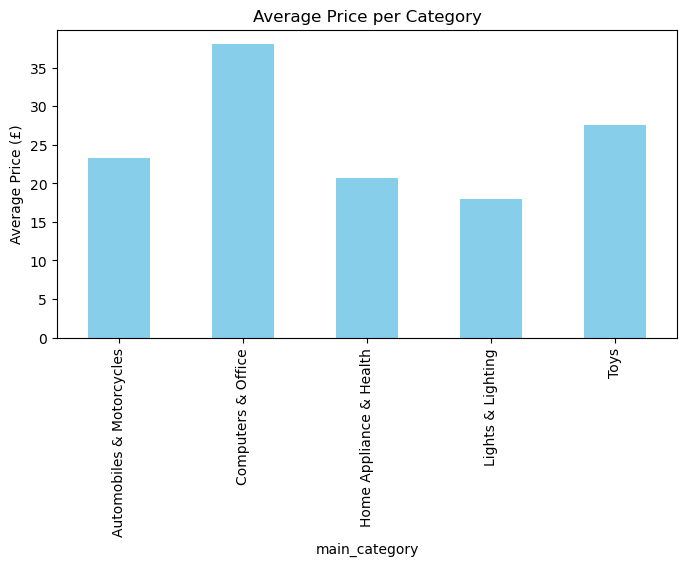

In [ ]:
##Average Price per Category

avg_price = df.groupby('main_category')['price'].mean()

plt.figure(figsize=(8,4))
avg_price.plot(kind='bar', color='skyblue')
plt.ylabel("Average Price (£)")
plt.title("Average Price per Category")
plt.show()


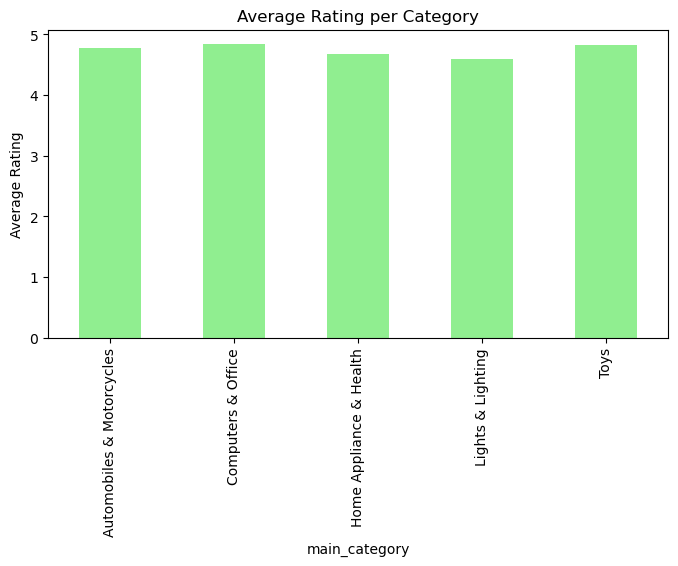

In [ ]:
#Average Rating per Category

avg_rating = df.groupby('main_category')['rating'].mean()

plt.figure(figsize=(8,4))
avg_rating.plot(kind='bar', color='lightgreen')
plt.ylabel("Average Rating")
plt.title("Average Rating per Category")
plt.show()


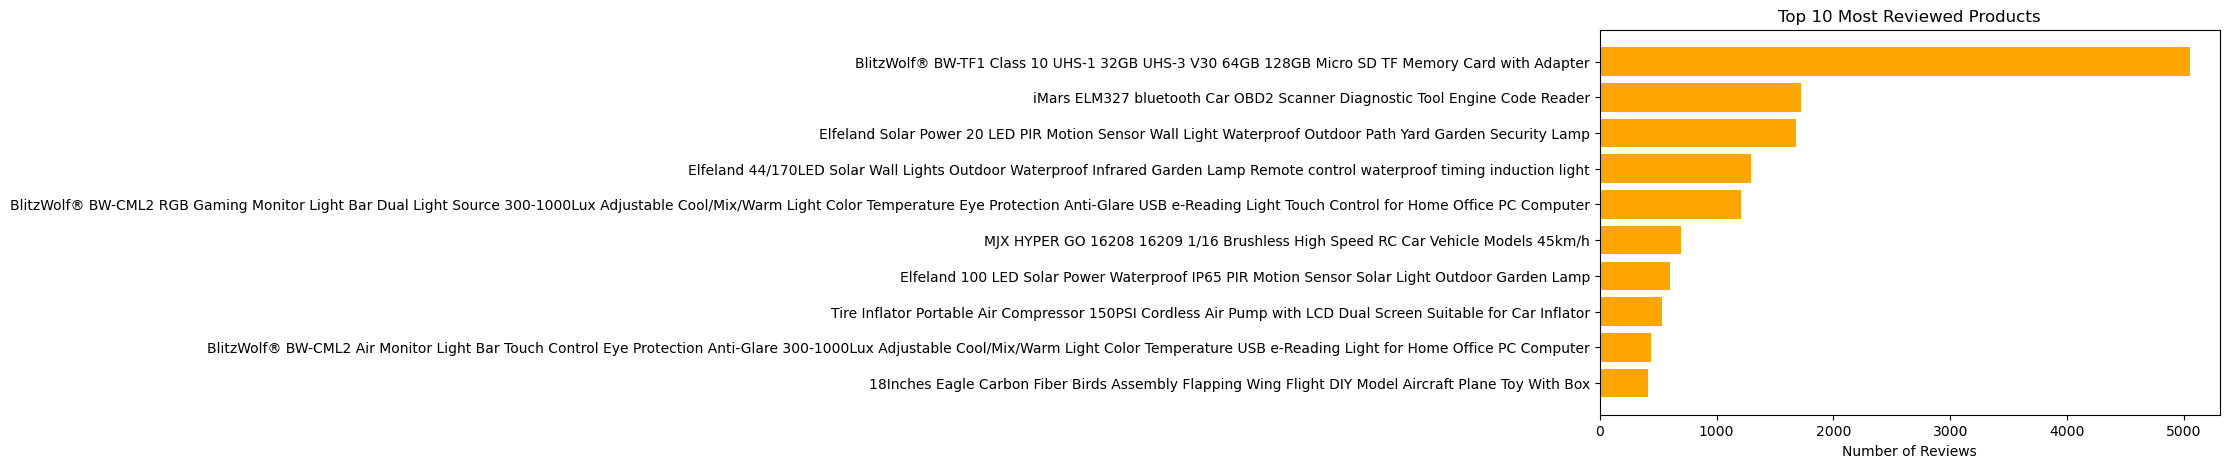

In [ ]:
#Top 10 Most Reviewed Products

top_reviews = df.sort_values(by='reviews', ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(top_reviews['title'], top_reviews['reviews'], color='orange')
plt.xlabel("Number of Reviews")
plt.title("Top 10 Most Reviewed Products")
plt.gca().invert_yaxis()  # Highest on top
plt.show()


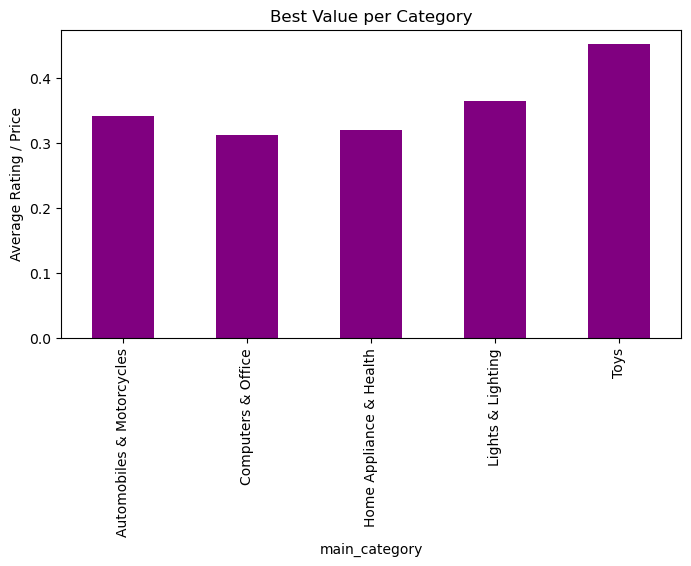

In [ ]:
##Best Value per Category

best_value_cat = df.groupby('main_category')['best_value'].mean()

plt.figure(figsize=(8,4))
best_value_cat.plot(kind='bar', color='purple')
plt.ylabel("Average Rating / Price")
plt.title("Best Value per Category")
plt.show()


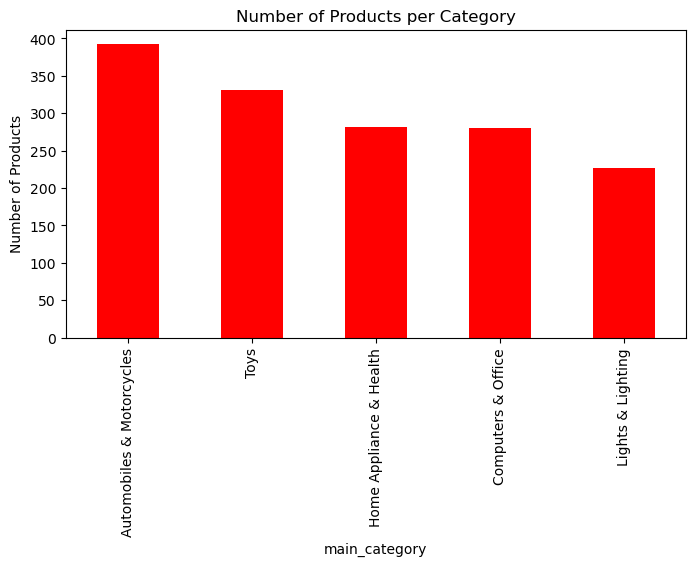

In [ ]:
###Number of Products per Category

product_count = df['main_category'].value_counts()

plt.figure(figsize=(8,4))
product_count.plot(kind='bar', color='red')
plt.ylabel("Number of Products")
plt.title("Number of Products per Category")
plt.show()


In [46]:
import pyodbc
print(pyodbc.drivers())


['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server']


In [ ]:
import pyodbc
import pandas as pd


# 1. Connect to SQL Server 

server = "DESKTOP-K4EF3Q0"
username = "sa"
password = "shah123"

conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};DATABASE=master;UID={username};PWD={password}",
    autocommit=True
)
cursor = conn.cursor()
print("Connected to SQL Server!")


# 2. Create Banggood database if not exists

db_name = "Banggood"
cursor.execute(f"SELECT name FROM sys.databases WHERE name='{db_name}'")
if not cursor.fetchone():
    cursor.execute(f"CREATE DATABASE {db_name}")
    print(f"Database '{db_name}' created!")
else:
    print(f"Database '{db_name}' already exists.")


# 3. Connect to Banggood database

conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};DATABASE={db_name};UID={username};PWD={password}",
    autocommit=True
)
cursor = conn.cursor()
cursor.fast_executemany = True
print(f"Connected to {db_name} database!")


# 4. Create Products table if not exists

create_table_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Products' AND xtype='U')
CREATE TABLE Products (
    ID INT IDENTITY(1,1) PRIMARY KEY,
    main_category NVARCHAR(255),
    subcategory NVARCHAR(255),
    title NVARCHAR(MAX),
    url NVARCHAR(MAX),
    price_gbp FLOAT,
    price_usd FLOAT,
    rating_clean FLOAT,
    reviews_clean INT,
    high_rating BIT,
    popular BIT
)
"""
cursor.execute(create_table_query)
print("Products table ready!")


df = pd.read_csv("banggood_clean_data.csv")  
df.columns = df.columns.str.strip() 


df = df.where(pd.notnull(df), None)


numeric_cols = ['price_gbp', 'price_usd', 'rating_clean', 'reviews_clean']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df[numeric_cols] = df[numeric_cols].fillna(0)

bool_cols = ['high_rating', 'popular']
for col in bool_cols:
    df[col] = df[col].astype(int)  


cols = df.columns.tolist()
cols_sql = ", ".join([f"[{col}]" for col in cols])
placeholders = ", ".join(["?"] * len(cols))

chunk_size = 500 

for start in range(0, len(df), chunk_size):
    end = start + chunk_size
    chunk = df.iloc[start:end]
    data_tuples = [tuple(row) for row in chunk.itertuples(index=False)]
    try:
        cursor.executemany(
            f"INSERT INTO Products ({cols_sql}) VALUES ({placeholders})",
            data_tuples
        )
        conn.commit()
        print(f"Inserted rows {start} to {min(end-1, len(df)-1)}")
    except Exception as e:
        print(f"Error inserting rows {start} to {end-1}: {e}")

print("All CSV data inserted successfully!")


cursor.execute("""
    SELECT TABLE_NAME 
    FROM INFORMATION_SCHEMA.TABLES 
    WHERE TABLE_TYPE='BASE TABLE'
""")
tables = cursor.fetchall()
print("\nTables in Banggood Database:")
for t in tables:
    print("-", t[0])


Connected to SQL Server!
Database 'Banggood' already exists.
Connected to Banggood database!
Products table ready!
Inserted rows 0 to 499
Inserted rows 500 to 999
Inserted rows 1000 to 1499
Inserted rows 1500 to 1510
All CSV data inserted successfully!

Tables in Banggood Database:
- Products
